In [1]:
from EditCard import *
from param_card_editor import *
import subprocess
import time
import numpy as np
import shutil
import pT_utils 
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
def Run_MG5(mg5_path, proc_card_path, proc_card_name='proc_card.dat'):
    process = subprocess.Popen([mg5_path+'bin/mg5_aMC', proc_card_path+proc_card_name], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    try:
        while process.poll() is None:
            time.sleep(.1)  # Add a small delay to reduce CPU usage
    finally:
        process.stdout.close()
        process.stderr.close()
        process.wait()  # Ensure the process is fully terminated
        display("Process cleaned up.")

In [3]:
MG5_PATH = '/home/leo/MadStats/MadGraph2/mg5amcnlo/'
PROC_CARD_PATH = '/home/leo/MadStats/automation/input/'
GEN_EVENT_INPUT_SPEC = '/home/leo/MadStats/automation/input/gen_event_input.mg5'
Framework_name = 'AUTO_OUT'  #TODO: make this user edditable 

In [4]:
edit_card_spec(PROC_CARD_PATH+'proc_card.dat')

#************************************************************
#*                        MadGraph 5                        *
#*                                                          *
#*                *                       *                 *
#*                  *        * *        *                   *
#*                    * * * * 5 * * * *                     *
#*                  *        * *        *                   *
#*                *                       *                 *
#*                                                          *
#*                                                          *
#*    The MadGraph Development Team - Please visit us at    *
#*    https://server06.fynu.ucl.ac.be/projects/madgraph     *
#*                                                          *
#************************************************************
#*                                                          *
#*               Command File for MadGraph 5                *
#*      

Text(value='import model sm', layout=Layout(width='550px'))

# Define multiparticle labels


Text(value='define p = g u c d s u~ c~ d~ s~', layout=Layout(width='550px'))

Text(value='define j = g u c d s u~ c~ d~ s~', layout=Layout(width='550px'))

Text(value='define l+ = e+ mu+', layout=Layout(width='550px'))

Text(value='define l- = e- mu-', layout=Layout(width='550px'))

Text(value='define vl = ve vm vt', layout=Layout(width='550px'))

Text(value='define vl~ = ve~ vm~ vt~', layout=Layout(width='550px'))

# Specify process(es) to run


Text(value='generate p p > e- ve~ @1', layout=Layout(width='550px'))

Text(value='add process p p > e- ve~ j @2', layout=Layout(width='550px'))

Text(value='add process p p > t t~ @3', layout=Layout(width='550px'))

# Output processes to MadEvent directory


Text(value='output AUTO', layout=Layout(width='550px'))

# This will create a directory PROC_$MODELNAME_$X
# If you want to specify the path/name of the directory use
# output PATH

# To generate events, you can go to the created directory and
# run ./bin/generate_events


Button(description='Save', style=ButtonStyle())

Output()

In [5]:
Run_MG5(MG5_PATH, PROC_CARD_PATH)

'Process cleaned up.'

In [6]:
def find(f_spec, begins):
    with open(f_spec, 'r') as file:
        for line in file:
            if line.strip().upper().startswith(begins.upper()):
                return line

In [7]:
out_name = find(PROC_CARD_PATH+'proc_card.dat', 'output').split()[1]

In [8]:
input_file = '/home/leo/MadStats/automation/input/gen_event_input.mg5'
GEN_EVENT_SPEC = '/home/leo/MadStats/automation/routines/'+out_name+'/bin/generate_events'
working_directory = '/home/leo/MadStats/automation/routines/'+out_name+'/Cards'

card = ParamCard(working_directory)  # default name = param_card.dat

In [9]:
card.path

'/home/leo/MadStats/automation/routines/AUTO/Cards'

In [10]:
shutil.copy(card.path+'/param_card.dat', card.path+'/param_card.bak')

for MH in np.linspace(75, 175, 10):
    shutil.copy(card.path+'/param_card.bak', card.path+'/param_card.dat')  # start with the origional card 
    card.set_value('MASS', 25, MH)  # set the new value 
    card.write(overwrite=True)      # write to p_c.out 
    os.rename(card.path+'/param_card.out', card.path+'/param_card.dat')  # copy over p_c.dat
    
    print('Working on MH =', MH, '...')
    # Build the command
    command = f"{GEN_EVENT_SPEC} -f < {input_file}"
    # Execute the command, changing the working directory
    try:
        result = subprocess.run(command, shell=True, check=True, cwd=working_directory, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
        print("Process completed successfully.")
    except subprocess.CalledProcessError as e:
        print(f"Process failed with error: {e}")
        print(card.dfs()['MASS'], '\n')
    print('MH =', MH, ' complete')

shutil.copy(card.path+'/param_card.bak', card.path+'/param_card.dat')  # restore the origional card
os.remove(card.path+'/param_card.bak')   # cleanup any resadue

wrote: /home/leo/MadStats/automation/routines/AUTO/Cards/param_card.out
Working on MH = 75.0 ...
Process completed successfully.
MH = 75.0  complete
wrote: /home/leo/MadStats/automation/routines/AUTO/Cards/param_card.out
Working on MH = 86.11111111111111 ...
Process completed successfully.
MH = 86.11111111111111  complete
wrote: /home/leo/MadStats/automation/routines/AUTO/Cards/param_card.out
Working on MH = 97.22222222222223 ...
Process completed successfully.
MH = 97.22222222222223  complete
wrote: /home/leo/MadStats/automation/routines/AUTO/Cards/param_card.out
Working on MH = 108.33333333333333 ...
Process completed successfully.
MH = 108.33333333333333  complete
wrote: /home/leo/MadStats/automation/routines/AUTO/Cards/param_card.out
Working on MH = 119.44444444444444 ...
Process completed successfully.
MH = 119.44444444444444  complete
wrote: /home/leo/MadStats/automation/routines/AUTO/Cards/param_card.out
Working on MH = 130.55555555555554 ...
Process completed successfully.
MH =

In [11]:
def find_file(start_path, filename):
    return list(Path(start_path).rglob(filename))

# Example usage
start_directory = '/home/leo/MadStats/automation/routines/AUTO/Events'
file_to_find_gz = 'unweighted_events.lhe.gz'
found_files_gz = find_file(start_directory, file_to_find_gz)

for file in found_files_gz:  # decompress all files 
    print(f"Unziping: {file} ...")
    !gunzip {file}

file_to_find = 'unweighted_events.lhe'
found_files = find_file(start_directory, file_to_find)

results = dict()
for file in found_files:    # use Pythia to find pT for all LHEs 
    print(f"Showering: {file} ...")
    results[str(file)] = pT_utils.pT(15, 10000, str(file))

Unziping: /home/leo/MadStats/automation/routines/AUTO/Events/run_01/unweighted_events.lhe.gz ...
Unziping: /home/leo/MadStats/automation/routines/AUTO/Events/run_05/unweighted_events.lhe.gz ...
Unziping: /home/leo/MadStats/automation/routines/AUTO/Events/run_03/unweighted_events.lhe.gz ...
Unziping: /home/leo/MadStats/automation/routines/AUTO/Events/run_04/unweighted_events.lhe.gz ...
Unziping: /home/leo/MadStats/automation/routines/AUTO/Events/run_09/unweighted_events.lhe.gz ...
Unziping: /home/leo/MadStats/automation/routines/AUTO/Events/run_07/unweighted_events.lhe.gz ...
Unziping: /home/leo/MadStats/automation/routines/AUTO/Events/run_08/unweighted_events.lhe.gz ...
Unziping: /home/leo/MadStats/automation/routines/AUTO/Events/run_06/unweighted_events.lhe.gz ...
Unziping: /home/leo/MadStats/automation/routines/AUTO/Events/run_02/unweighted_events.lhe.gz ...
Unziping: /home/leo/MadStats/automation/routines/AUTO/Events/run_10/unweighted_events.lhe.gz ...
Showering: /home/leo/MadStats/

In [12]:
results

{'/home/leo/MadStats/automation/routines/AUTO/Events/run_01/unweighted_events.lhe': ({'number of particles': 457,
   'status': 0},
  array([1.16090869e+01, 1.33909628e+00, 3.78863306e+01, 6.28178996e+01,
         2.03149687e+01, 2.62503868e+01, 2.66543729e+00, 4.29648400e+01,
         7.34922644e+00, 3.12819971e+01, 2.82435682e+01, 2.16671279e+02,
         1.36683753e+01, 1.36683841e+01, 5.86925500e+00, 3.72588535e+01,
         2.87123242e+00, 2.61762432e+00, 3.02007728e+01, 1.76041366e+00,
         6.09476600e+00, 7.98335899e-01, 1.75646267e+00, 1.69869036e+01,
         2.60419644e+00, 6.11946173e+01, 5.70091625e+00, 9.37898651e+00,
         1.32026857e+01, 1.85977295e+01, 5.47551982e+01, 1.26280213e+01,
         8.60836296e+01, 2.06641916e+01, 5.30136369e+01, 1.50006568e+01,
         1.98497262e+00, 4.17921814e+01, 6.44046074e+01, 4.31147402e+01,
         4.78561278e+01, 4.78561168e+01, 1.19073051e+00, 1.88880348e+00,
         2.08492590e+01, 9.71488287e+01, 1.68884732e+01, 1.4580688

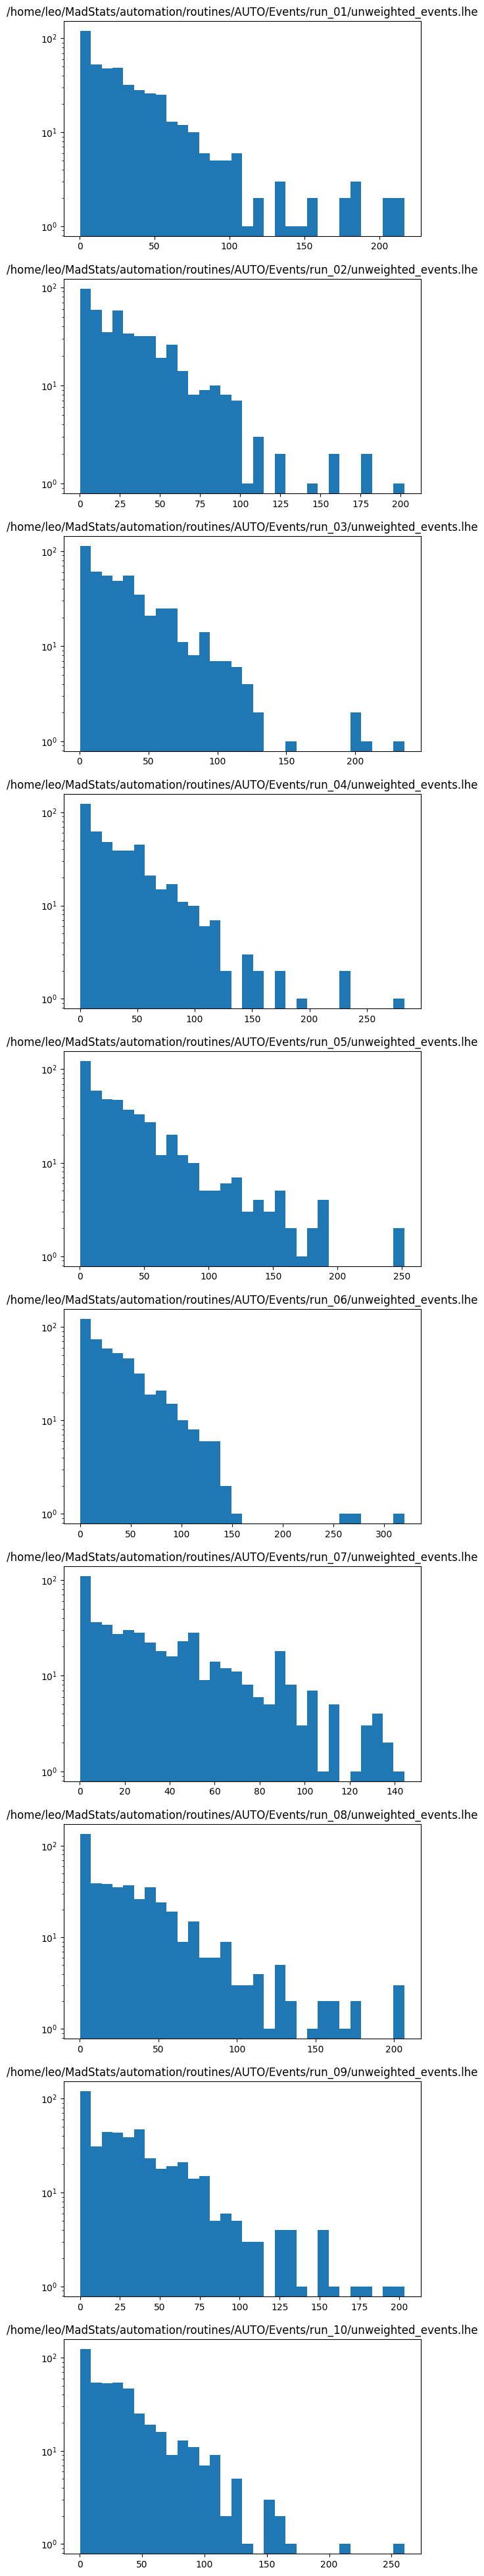

In [13]:
fig, ax = plt.subplots(len(results), figsize=(7, len(results)*5))

ks = [key for key in results.keys()]

for i, k in enumerate(sorted(ks)):
    ax[i].hist(results[k][1], bins=30)
    ax[i].set_title(k)
    ax[i].set_yscale('log')
plt.show()